In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from scipy.fftpack import fftn, ifftn, fftshift

# Functions 

In [2]:
# Normalizes the image to the interval [a, b]
def normalize(r, a, b):
    return a + (b-a)*(r - np.amin(r))/( np.amax(r) - np.amin(r))

In [3]:
def gaussian_filter(k=3, sigma=1.0):
    arx = np.arange((-k // 2) + 1.0, (k // 2) + 1.0)
    x, y = np.meshgrid(arx, arx)
    filt = np.exp( -(1/2)*(np.square(x) + np.square(y))/np.square(sigma) )
    return filt/np.sum(filt)

In [4]:
def denoise(G, H):
    '''
        Denoise an image g using a gaussian filter h, given their fourier transformations (G and H)
    '''
    R = np.multiply(G, H)
    
    return np.real(fftshift(ifftn(R)))

In [5]:
# Constrained Least Squares method
def CLS(G, H, P, gamma):
    # Complex conjugate of H
    numerator = np.multiply(np.conj(H), G)
    
    # Sum the power spectra of H and P multiplying the former by gamma first
    denominator = (np.abs(H)**2) + (gamma * (np.abs(P)**2))
    
    F_hat = np.divide(numerator, denominator)
      
    return np.real(fftshift(ifftn(F_hat)))

# Reading input and execution

In [17]:
# Reads input
filename = str(input()).rstrip()
g        = imageio.imread(filename)
k        = int(input())
sigma    = float(input())
gamma    = float(input())

images/case_b2_n.png
11
1
0.00001


In [18]:
# Computes the gaussian filter
h = gaussian_filter(k, sigma)

# Pads the gaussian filter
pad = (g.shape[0]//2) - h.shape[0]//2
h_padded = np.pad(h, (pad, pad-1), mode='constant', constant_values=0)

In [19]:
# Computes the fourier transforms
G = fftn(g)
H = fftn(h_padded)

In [20]:
r = denoise(G, H)

In [21]:
r = normalize(r, 0, np.amax(g))

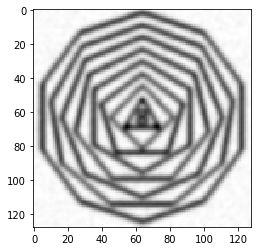

In [22]:
plt.imshow(r, cmap='gray')

In [23]:
# Initializes the laplacian operator
p = np.array([[ 0.0, -1.0,  0.0],
              [-1.0,  4.0, -1.0],
              [ 0.0, -1.0,  0.0]])

# Pads the laplacian operator
pad = (g.shape[0]//2) - p.shape[0]//2
p_padded = np.pad(p, (pad, pad-1), mode='constant', constant_values=0)

# Performs the fourier transform on the padded laplacian operator
P = fftn(p_padded)
R = fftn(r)

In [24]:
f_hat = CLS(R, H, P, gamma)

In [25]:
f_hat = normalize(f_hat, 0, np.amax(r))

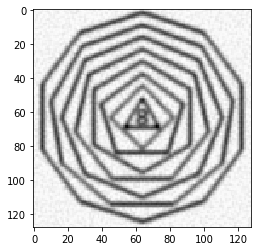

In [26]:
plt.imshow(f_hat, cmap='gray')

In [27]:
print("%.1f" % np.std(f_hat))

56.7


# Testing 